In [1]:
import torch
import torch.nn as nn
from rvit import RegisteredVisionTransformer
from Deep_Learning.Representation_Learning.Utils.functional import cosine_schedule
import matplotlib.pyplot as plt

c:\Users\joeag\Documents\venvs\ml-env\Lib\site-packages\torchvision\datapoints\__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
c:\Users\joeag\Documents\venvs\ml-env\Lib\site-packages\torchvision\transforms\v2\__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you

In [37]:
model = HAugPC(1, 5)

x = torch.randn(10, 1, 28, 28)

z = model(x)
print(z.shape)
x_hat = model.generate(z, stop_at=0)
target = model(x, stop_at=0)
x_hat.shape, target.shape

torch.Size([10, 32, 14, 14])
torch.Size([10, 64, 7, 7])
torch.Size([10, 128, 5, 5])
torch.Size([10, 256, 3, 3])
torch.Size([10, 256, 1, 1])
torch.Size([10, 256])
torch.Size([10, 256, 1, 1])
torch.Size([10, 256, 3, 3])
torch.Size([10, 128, 5, 5])
torch.Size([10, 64, 7, 7])
torch.Size([10, 32, 14, 14])
torch.Size([10, 1, 28, 28])


(torch.Size([10, 1, 28, 28]), torch.Size([10, 1, 28, 28]))

In [6]:
encoder = RegisteredVisionTransformer(

    image_size=28,
    patch_size=7,
    num_layers=6,
    num_heads=4,
    hidden_dim=256,
    num_registers=4,
    mlp_dim=1024,
)
encoder.conv_proj = nn.Conv2d(1, 256, kernel_size=7, stride=7)
encoder.heads = nn.Identity()
num_features = 256

x = torch.randn(10, 1, 28, 28)
encoder.conv_proj(x).reshape(-1, num_features, 16).shape

torch.Size([10, 256, 16])

([<matplotlib.lines.Line2D at 0x1de02eaee50>], tensor(0.0744))

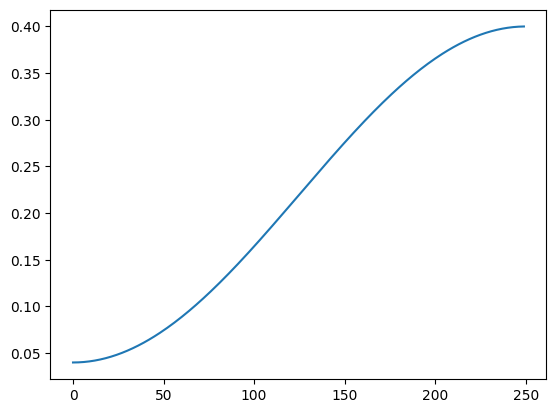

In [7]:
lrs = cosine_schedule(0.04, 0.4, 250)
plt.plot(lrs), lrs[50]

In [7]:
from torchvision.models import resnet18

model = resnet18()
model.conv1 = nn.Conv2d(1, 64, kernel_size=(3,3), padding=(1,1), bias=False)
model.maxpool=nn.Identity()
# model.fc = nn.Linear(512, 256)
model
# x = torch.randn(1, 1, 28, 28)
# model(x).shape

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): Identity()
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

In [10]:
decoder = nn.Sequential(
    nn.Unflatten(1, (256, 1, 1)),

    nn.ConvTranspose2d(256, 512, 3, 1),
    nn.ReLU(),

    nn.ConvTranspose2d(512, 256, 3, 3),
    nn.ReLU(),
    
    nn.ConvTranspose2d(256, 128, 3, 3),
    nn.ReLU(),
    
    nn.ConvTranspose2d(128, 64, 2, 1),
    nn.ReLU(),

    nn.Conv2d(64, 1, 3, 1, 1),
)

z = torch.randn(1, 256)
decoder(z).shape

torch.Size([1, 1, 28, 28])

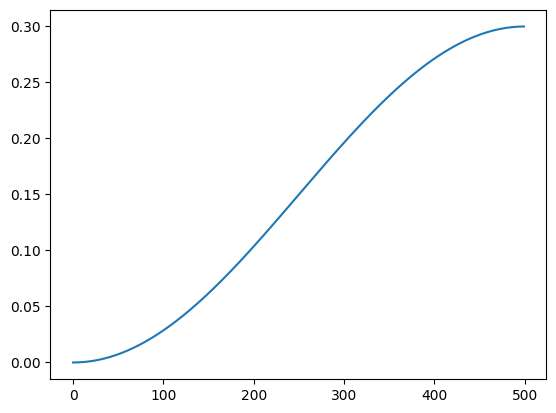

In [14]:
num_epochs = 500
aug_ps = cosine_schedule(0.0, 0.30, num_epochs)
plt.plot(aug_ps)

In [8]:
encoder = RegisteredVisionTransformer(
    image_size=28,
    patch_size=7,
    num_layers=4,
    num_heads=4,
    hidden_dim=256,
    num_registers=4,
    mlp_dim=1024,
)
encoder.conv_proj = nn.Conv2d(1, 256, kernel_size=7, stride=7)
encoder.heads = nn.Identity()
# x = torch.randn(1, 1, 28, 28)
encoder(x).shape
# encoder

torch.Size([1, 256])

In [9]:
experiment = 'MNIST'
experiment_name = 'RViT'
save_dir = f'Deep_Learning/Representation_Learning/Examples/MNIST/out/models/{experiment}/{experiment_name}.pth'
parent_dir = save_dir.rsplit('/', 1)[0]
parent_dir

'Deep_Learning/Representation_Learning/Examples/MNIST/out/models/MNIST'